In [60]:
import os
from transformers.image_transforms import center_to_corners_format, corners_to_center_format
import torch
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

image_fp = 'drive/MyDrive/simulated_cube_dataset/{}/images/'
label_fp = 'drive/MyDrive/simulated_cube_dataset/{}/labels/'

def determine_split(im_processed: int):
  '''
  takes in integer value, returns split and upper bound
  '''
  if im_processed < 800:
    return 'train', 799
  elif 800 <= im_processed < 900:
    return 'val', 899
  else:
    return 'test', 1000

def determine_batch(curr, upper_bound):
  """
  checks if 20 will overflow current split, returns proper value
  """
  next_batch = curr + 50
  res = upper_bound - next_batch
  if res < 0:
    return 50 + res
  else:
    return 50


def get_fns(cur, batch):
  return ["{:04d}".format(i) for i in range(cur, cur + batch + 1)]

def get_images(split, fns):
  im_path = Path(image_fp.format(split))
  images = [Image.open(im_path / (fn + '.jpg')).resize((500,500)) for fn in fns]
  return images

def get_labels(split, fns):
  lbl_path = Path(label_fp.format(split))
  labels = []
  for fn in fns:
    with open(lbl_path/(fn+'.txt'), 'r') as fp:
      cleanedvals =[list(map(float, box.strip().split()[1:])) for box in fp.readlines()]
      labels.append(cleanedvals)
  return labels

def get_center_labels(labels):
  res = []
  for label in labels:
    x,y,w,h = label
    if abs(x - 0.5) < 0.1 and abs(y-0.5) < 0.1:
      res.append(label)
  return res

def crop_image(image, label):
  label = torch.Tensor([label]) * 500
  label = center_to_corners_format(label)
  x1,y1,x2,y2 = [int(x) for x in label[0]]
  cropped_im = image.crop((x1,y1,x2,y2))
  return cropped_im

def write_label(split, fn, boxes):
  path = label_fp / split / (fn + '.txt')
  with open(path, 'w') as fp:
    for box in boxes:
      res = " ".join(map(str, box)) + '\n'
      fp.write(res)

path = 'drive/MyDrive/simulated_cube_dataset/train/labels/'
problem_paths = []
# fps = [fp for os.listdir('drive/MyDrive/simulated_cube_dataset/train/labels') if fp.endswith('.txt')]
for i, pth in enumerate(os.listdir(path)):
  with open(path + pth, 'r') as fp:
    if len(fp.readlines()) > 1:
      print(pth)
      problem_paths.append(pth)
# with open('drive/MyDrive/simulated_cube_dataset/train/labels/0000.txt', 'r') as fp:
#   print(len(fp.readlines()))

0154.txt
0157.txt
0339.txt
0672.txt
0673.txt
0674.txt
0675.txt
0677.txt
0679.txt
0676.txt
0737.txt
0739.txt


In [56]:
iso_image_fp = 'drive/MyDrive/isolated_cube_dataset/{}/images/'
iso_label_fp = 'drive/MyDrive/isolated_cube_dataset/{}/labels/'

for split in ['train','test','val']:
  os.makedirs(iso_image_fp.format(split), exist_ok=True)
  os.makedirs(iso_label_fp.format(split), exist_ok=True)

In [61]:
cur = 0

while cur <= 1000:
  split, upper_bound = determine_split(cur)
  batch = determine_batch(cur, upper_bound)
  fns = get_fns(cur, batch)
  images = get_images(split, fns)
  labels = get_labels(split, fns)
  print(f'Cropping {cur}-{cur+batch} images in {split} split')
  for i, (image, label) in enumerate(zip(images, labels)):
    label = get_center_labels(label)
    for lbl in label:
      img = crop_image(image, lbl)
      fp = iso_image_fp.format(split)
      save_path = Path(fp) / (fns[i] + '.jpg')
      img.save(save_path)
  print(f'Cropped {cur}-{cur+batch} images in {split} split')
  if not batch:
    cur += 1
  cur += batch

# fns = get_fns(5, 5)
# print(len(fns))
# fns = [pth.split('.')[0] for pth in problem_paths]
# images = get_images('train', fns)
# labels = get_labels('train', fns)

# for i, (image, label) in enumerate(zip(images, labels)):
#   label = get_center_labels(label)
#   for lbl in label:
#     plt.imshow(image)
#     plt.show()
#     print(lbl, label)
#     img = crop_image(image, lbl)
#     img.save(f'{i}.jpg')
#     plt.imshow(img)
#     plt.show()

Cropping 0-50 images in train split
Cropped 0-50 images in train split
Cropping 50-100 images in train split
Cropped 50-100 images in train split
Cropping 100-150 images in train split
Cropped 100-150 images in train split
Cropping 150-200 images in train split
Cropped 150-200 images in train split
Cropping 200-250 images in train split
Cropped 200-250 images in train split
Cropping 250-300 images in train split
Cropped 250-300 images in train split
Cropping 300-350 images in train split
Cropped 300-350 images in train split
Cropping 350-400 images in train split
Cropped 350-400 images in train split
Cropping 400-450 images in train split
Cropped 400-450 images in train split
Cropping 450-500 images in train split
Cropped 450-500 images in train split
Cropping 500-550 images in train split
Cropped 500-550 images in train split
Cropping 550-600 images in train split
Cropped 550-600 images in train split
Cropping 600-650 images in train split
Cropped 600-650 images in train split
Croppin

In [12]:
image_fp = 'drive/MyDrive/simulated_cube_dataset/{}/images/'


'drive/MyDrive/simulated_cube_dataset/test/images/'

[[0.5127982497215271, 0.5007016658782959, 0.28395867347717285, 0.32773756980895996]]
tensor([[256.3991, 250.3508, 141.9793, 163.8688]])
[[0.5091146230697632, 0.5096458792686462, 0.2840181589126587, 0.3923245370388031]]
tensor([[254.5573, 254.8229, 142.0091, 196.1623]])
[[0.49330174922943115, 0.500066876411438, 0.19301056861877441, 0.23614093661308289]]
tensor([[246.6509, 250.0334,  96.5053, 118.0705]])
[[0.5093775987625122, 0.5011875629425049, 0.2769511938095093, 0.3070276975631714]]
tensor([[254.6888, 250.5938, 138.4756, 153.5139]])
[[0.5034475922584534, 0.4991443455219269, 0.19715842604637146, 0.20162314176559448]]
tensor([[251.7238, 249.5722,  98.5792, 100.8116]])
[[0.5075200796127319, 0.5019547939300537, 0.28941452503204346, 0.31665661931037903]]
tensor([[253.7600, 250.9774, 144.7073, 158.3283]])
[[0.5031893253326416, 0.500024139881134, 0.24068224430084229, 0.24615931510925293]]
tensor([[251.5947, 250.0121, 120.3411, 123.0797]])
[[0.4916636645793915, 0.511942446231842, 0.3266355395

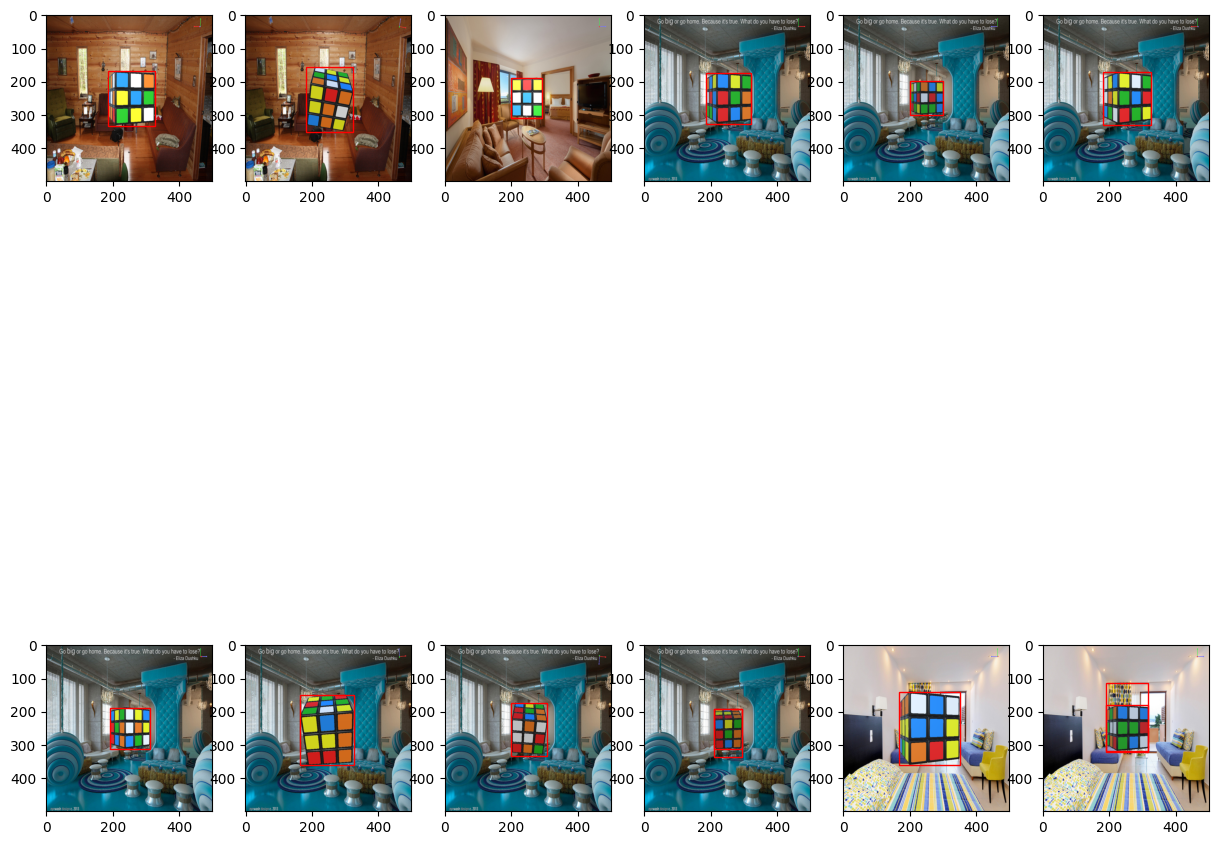

In [8]:
img_root = 'drive/MyDrive/simulated_cube_dataset/train/images/'
image_paths = [img_root + fn.split(".")[0] + '.jpg' for fn in problem_paths]
problem_vals = []
for pt in problem_paths:
  with open(path + pt, 'r') as fp:
    problem_vals.append(fp.readlines())

images = [Image.open(img).resize((500,500)) for img in image_paths]

fig, axes = plt.subplots(2, 6, figsize=(15,15))
axes = axes.flatten()

for i, (im, boxes) in enumerate(zip(images, problem_vals)):
  ax = axes[i]
  ax.imshow(im)
  boxes = [list(map(float, box.strip().split()[1:])) for box in boxes]
  kept_boxes = []
  for box in boxes:
    x,y,w,h = box
    if abs(x - 0.5) <= 0.1 and abs(y - 0.5) <= 0.1:
      kept_boxes.append(box)
  boxes = torch.Tensor(boxes) * 500
  boxes = center_to_corners_format(boxes)
  print(kept_boxes)
  kept_boxes = torch.Tensor(kept_boxes) * 500
  print(kept_boxes)
  kept_boxes = center_to_corners_format(kept_boxes)
  for box in kept_boxes:
    x1, y1, x2, y2 = [int(x) for x in box]
    ax.add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, color='red'))
plt.show()


tensor([[0.5090, 0.4345, 0.2553, 0.4146],
        [0.5086, 0.5010, 0.2548, 0.2777]])


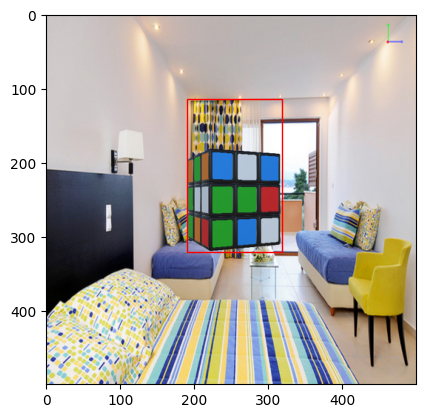

In [36]:
boxes = [[0.5090393424034119, 0.43450331687927246, 0.25533556938171387, 0.4145984649658203], [0.5086209774017334, 0.5009862780570984, 0.25483468174934387, 0.2777409553527832]]



scaled_boxes = center_to_corners_format(torch.Tensor(boxes) * 500)
print(torch.Tensor(boxes))
img = Image.open('drive/MyDrive/simulated_cube_dataset/train/images/0739.jpg')
img = img.resize((500, 500))

fig, ax = plt.subplots(1,1)
ax.imshow(img)
# for box in scaled_boxes:
x1, y1, x2, y2 = [int(x) for x in scaled_boxes[0]]
ax.add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, color='red'))
plt.show()

